In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
from mylib import genomes

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

# Create data frame with variant mean for each gene (rows) and each population (columns)

In [5]:
adf = pd.DataFrame(columns=genomes.keys())
for population_name in genomes:
    genome_ids = genomes[population_name]
    #print(population_name, len(genome_ids))
    df = pd.read_csv(join(root_dir,f"output/{population_name}/all.csv"))
    df = df[genomes[population_name]+["gene"]]
    variant_mean = df.groupby(['gene']).sum().mean(axis=1)
    adf[population_name] = variant_mean

In [6]:
adf.shape

(36, 25)

In [7]:
adf.head(10)

,ACB,ASW,BEB,CDX,CHB,CHS,CLM,ESN,FIN,GBR,...,KHV,LWK,MSL,MXL,PEL,PJL,PUR,STU,TSI,YRI
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,20.731959,21.222222,11.081395,17.096774,13.784314,12.000000,13.861702,20.94,8.902913,13.864583,...,15.101010,19.346939,26.422222,11.761905,9.388235,12.802083,13.461538,13.068627,12.083333,24.823529
ANG,6.670103,6.685185,3.837209,2.010753,3.166667,2.819048,4.340426,6.83,4.893204,4.697917,...,2.111111,7.775510,6.066667,5.158730,6.105882,4.958333,5.375000,4.362745,5.296296,6.441176
ATXN2,115.618557,100.925926,16.069767,6.634409,5.941176,4.885714,24.648936,106.78,13.038835,11.677083,...,5.959596,119.520408,125.511111,25.873016,17.176471,17.031250,34.423077,17.058824,12.444444,118.754902
C19ORF12,16.422680,18.648148,9.569767,8.752688,8.107843,8.723810,9.595745,20.40,9.291262,9.000000,...,8.808081,17.510204,19.366667,8.904762,8.211765,9.739583,10.730769,9.872549,9.092593,18.813725
C9ORF72,21.639175,18.759259,18.139535,14.752688,13.754902,13.923810,17.574468,21.83,20.495146,20.010417,...,15.979798,19.622449,19.500000,16.968254,13.694118,20.395833,18.259615,18.705882,17.870370,21.637255
CHCHD10,2.185567,2.222222,0.965116,0.559140,0.598039,0.533333,1.670213,2.24,1.854369,1.656250,...,0.494949,2.030612,2.188889,1.301587,1.105882,1.020833,1.980769,1.098039,1.925926,2.196078
CHMP2B,7.309278,8.092593,8.081395,8.731183,7.333333,8.400000,9.531915,6.82,10.466019,10.187500,...,7.878788,8.551020,8.211111,7.714286,7.376471,9.020833,10.057692,8.372549,10.648148,7.431373
CHRNA3,18.865979,19.074074,16.441860,16.709677,17.656863,18.390476,16.031915,20.21,21.000000,20.531250,...,19.434343,19.744898,19.544444,13.412698,7.223529,17.937500,17.923077,17.852941,20.407407,19.539216
CREST,91.783505,74.055556,41.441860,35.247312,37.852941,29.685714,24.680851,96.74,19.766990,20.375000,...,39.737374,91.051020,96.566667,18.111111,16.600000,34.947917,26.519231,50.382353,19.759259,101.078431


# Transpose data frame (reverse orientation) so genes are the columns and populations are the rows

In [8]:
tdf = adf.transpose()

In [9]:
tdf.head(10)

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
ACB,20.731959,6.670103,115.618557,16.422680,21.639175,2.185567,7.309278,18.865979,91.783505,11.061856,...,2.072165,43.865979,27.824742,13.061856,9.742268,2.793814,31.391753,7.360825,3.958763,0.628866
ASW,21.222222,6.685185,100.925926,18.648148,18.759259,2.222222,8.092593,19.074074,74.055556,10.296296,...,2.000000,40.481481,24.277778,14.648148,10.148148,2.203704,27.666667,8.222222,4.055556,0.592593
BEB,11.081395,3.837209,16.069767,9.569767,18.139535,0.965116,8.081395,16.441860,41.441860,3.767442,...,0.372093,27.639535,8.639535,11.569767,2.790698,1.267442,16.034884,7.779070,2.151163,0.325581
CDX,17.096774,2.010753,6.634409,8.752688,14.752688,0.559140,8.731183,16.709677,35.247312,3.365591,...,0.376344,39.161290,8.806452,13.075269,2.720430,0.935484,25.720430,2.516129,2.623656,0.430108
CHB,13.784314,3.166667,5.941176,8.107843,13.754902,0.598039,7.333333,17.656863,37.852941,2.529412,...,0.500000,36.500000,9.137255,14.882353,2.931373,1.343137,17.862745,3.127451,2.950980,0.500000
CHS,12.000000,2.819048,4.885714,8.723810,13.923810,0.533333,8.400000,18.390476,29.685714,2.971429,...,0.447619,39.638095,8.190476,12.885714,2.552381,1.295238,19.885714,3.104762,3.200000,0.352381
CLM,13.861702,4.340426,24.648936,9.595745,17.574468,1.670213,9.531915,16.031915,24.680851,2.606383,...,0.574468,9.776596,12.521277,9.138298,1.851064,1.053191,19.840426,8.914894,2.808511,0.563830
ESN,20.940000,6.830000,106.780000,20.400000,21.830000,2.240000,6.820000,20.210000,96.740000,10.190000,...,2.640000,47.050000,32.810000,16.110000,11.630000,2.370000,35.960000,7.360000,4.440000,0.730000
FIN,8.902913,4.893204,13.038835,9.291262,20.495146,1.854369,10.466019,21.000000,19.766990,2.427184,...,0.922330,8.514563,8.330097,8.883495,0.834951,0.961165,28.893204,6.174757,2.135922,0.252427
GBR,13.864583,4.697917,11.677083,9.000000,20.010417,1.656250,10.187500,20.531250,20.375000,2.781250,...,0.645833,7.843750,9.656250,7.531250,1.218750,0.687500,24.760417,9.125000,2.062500,0.197917


# Check the population aggregated variant means per gene

In [10]:
tdf.shape

(25, 36)

In [11]:
features = tdf.values
labels = list(tdf.index)

# Cluster populations into groups with t-SNE and visualize the clusters

In [14]:
def cluster_populations(features, label, per=10, scaled=True, learning_rate=200):
    # Scale data to ensure data in each column has mean = 0 and variance = 1
    if scaled:
        scaled_features = StandardScaler().fit_transform(features)
        print("Perform scaling")
    else:
        scaled_features = features
        print("No scaling")
        
    # Perform clustering with t-SNE
    # t-SNE transforms input data to 2 components. Random_state set to make experiments reproducible and consistent 
    tsne = TSNE(n_components=2, random_state=42, perplexity=per,learning_rate=learning_rate)
    
    # Resulting clusters 
    X_embedded = tsne.fit_transform(scaled_features)
    
    # Visualize clusters 
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(
        X_embedded[:, 0], X_embedded[:, 1],
        c=range(len(labels)), cmap="tab20", s=80, alpha=0.8
    )
    
    # Annotate each point with its label
    for i, label in enumerate(labels):
        ax.text(
            X_embedded[i, 0] + 0.05,  # small x-offset to avoid overlap
            X_embedded[i, 1] + 0.05,  # small y-offset
            str(label),
            fontsize=9,
            alpha=0.9
        )
    
    ax.set_title(f"Clustering populations into clusters (t-SNE, perplexity={per})", fontsize=16)
    ax.set_xlabel("t-SNE Component 1", fontsize=14)
    ax.set_ylabel("t-SNE Component 2", fontsize=14)
    plt.tight_layout()
    plt.show()


# Adjust perplexity level (7,5,3) to visualize population clustering

Perform scaling


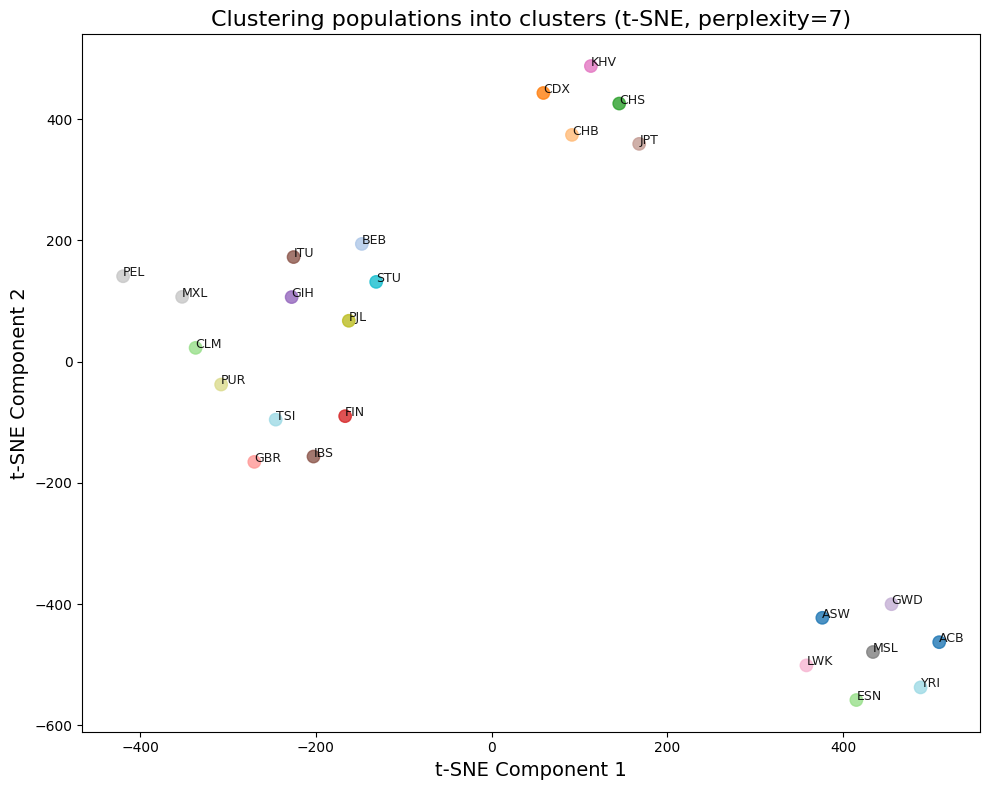

In [15]:
cluster_populations(features, labels, per=7)

Perform scaling


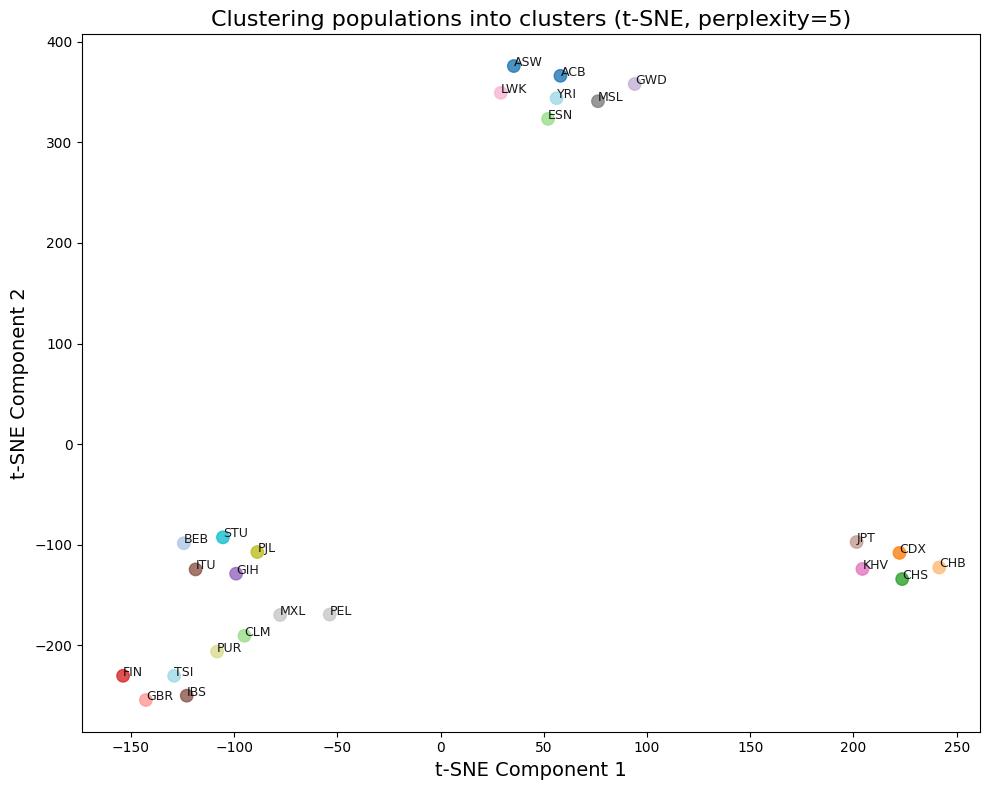

In [16]:
cluster_populations(features, labels, per=5)

Perform scaling


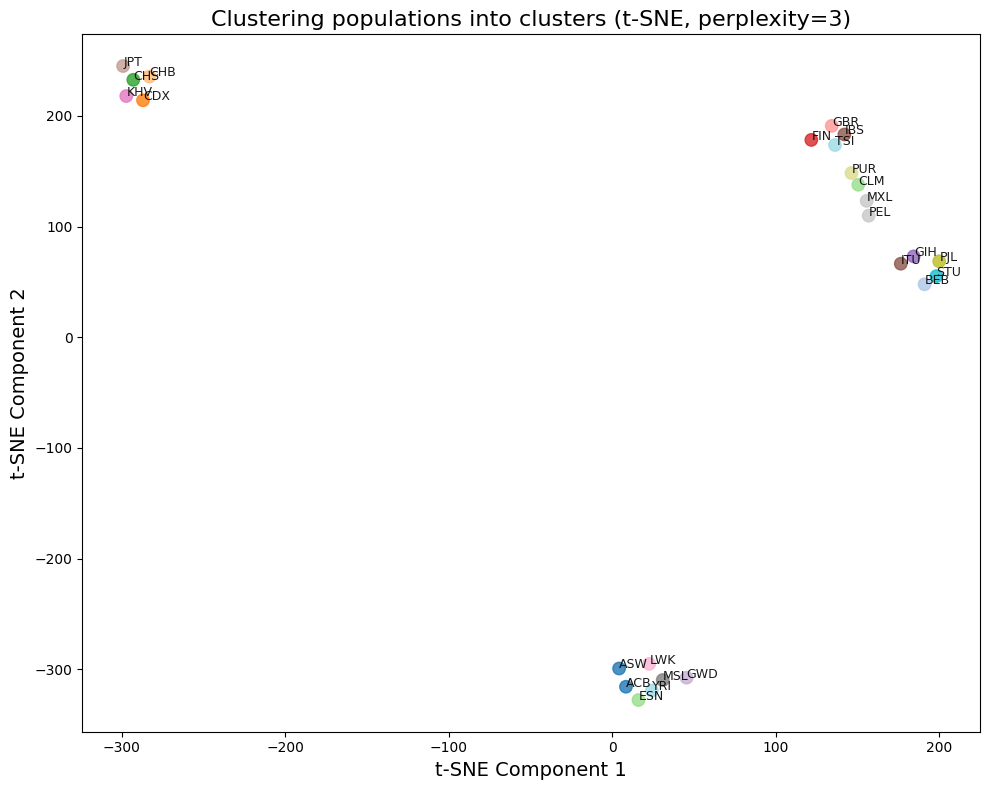

In [17]:
cluster_populations(features, labels, per=3)